# KAGGLE: House Prices Explarotary Data Analysis

# 1. Introduction and Problem Statement

Takim olarak, **Kaggle**'daki meshur projelerden birisi olan **'House Prices'** veri seti uzerinde calisacagiz.

Bu proje, detaylı bir Keşifsel Veri Analizi (EDA) gerçekleştirerek başlayacak, ardından veri ön işleme adımlarını tamamlayarak veri setimizi makine öğrenmesi modellemesi için hazırlayacak ve sonrasinda da farkli algoritmalari ve makine ogrenmesi modellerini tatbik edecegimiz **bir takım projesidir.**

Bu Kaggle projesi, **konut fiyatlarının tahmin edilmesi üzerine odaklanmaktadır.** Veri seti, farklı ev özelliklerini içeren geniş bir veri kümesini içermektedir. Özellikler arasında evin büyüklüğü, oda sayısı, konum gibi faktörler bulunmaktadır. Amacımız, bu özelliklerin bir evin fiyatını **nasıl etkilediğini belirlemek** ve bu bilgiyi kullanarak gelecekteki ev fiyatlarını tahmin etmektir.

Yarışmanın amacı, katılımcıların belirtilen veri kümesi üzerinde bir makine öğrenmesi modeli geliştirerek, verilen ev özelliklerine dayanarak bir evin fiyatını en doğru şekilde tahmin etmeleridir. Bu proje, veri bilimi becerilerinizi geliştirmek, yeteneklerinizi sergilemek ve literature butunsel bir katki saglamak **için mükemmel bir fırsat sunmaktadir**. Ayrıca, farklı makine öğrenmesi tekniklerini uygulama ve model performansını değerlendirme fırsatı sunmaktadır. Katılımcılar olarak özellik mühendisliği, model seçimi ve değerlendirmesi gibi kritik veri bilimi becerilerini uygulama şansına sahip olacagiz.

Projeyle ilgili daha detayli bilgi icin Kaggle sayfasina linkten ulasabilirsiniz. https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

#### __Proje kapsaminda yapilacak bir takim gorevler:__

* Veri on inceleme
* Eksik verilerle basa cikilmasi  -  nur - seda       
* Outlierlar ile basa cikilmasi  -  fatih              
* Feature Engineering (Ozellik muhendisligi) -     busra + zubeyde + fatih + cuneyt emre
* Istatistiksel analizler ve veri gorsellestirme  - seda nur 
* Encoding     -- burak
* Standardizasyon ve Normalizasyon -- burak
* High - Low Cardinality tespit edilmesi - tuba 
* Multicollinearity tespit edilmesi   - tuba
* Logarithmic Donusum (Log Transormation)  - fatih
* Github uzerinden takimca calisma becerileri

**ILAVE NOT**
projedeki en onemli kazanimlardan birisi de baskalarinin da anlayabilecegi ve YENIDEN kullanmasi kolay kod bloklari olusturmaktir.

**Is akisi**
- Herkes veriyi ve projeyi genel anlamda inceleyecek
- Missing value bolumu tamamlaninca buraya kodlari eklenecek
- sonrasinda herkes githubtan dosyayi yeni bir branch ile kaydedecek
- kendi bolumunuz uzerinde aciklama ve kod kisimlarini doldurabilirsiniz
- sonrasinda tum calismayi birlestirecegiz

- Lutfen oneri ve tavsiyelerimizi sunalim arkadaslar

# 2. Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('Display.max_columns', None)

In [3]:
df1 = pd.read_csv('house_prices_reduced.csv')

In [4]:
df1.head()

,Id,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleCondition,SalePrice,SaleType
0,1,8450,CollgCr,2Story,7,5,2003,2003,Gd,TA,No,GLQ,706,Unf,0,150,856,856,854,1710,1,0,2,1,3,Gd,8,Attchd,2003.0,RFn,2,548,TA,TA,0,61,0,0,0,0,NaN,NaN,2,2008,Normal,208500,WD
1,2,9600,Veenker,1Story,6,8,1976,1976,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,1262,0,1262,0,1,2,0,3,TA,6,Attchd,1976.0,RFn,2,460,TA,TA,298,0,0,0,0,0,NaN,NaN,5,2007,Normal,181500,WD
2,3,11250,CollgCr,2Story,7,5,2001,2002,Gd,TA,Mn,GLQ,486,Unf,0,434,920,920,866,1786,1,0,2,1,3,Gd,6,Attchd,2001.0,RFn,2,608,TA,TA,0,42,0,0,0,0,NaN,NaN,9,2008,Normal,223500,WD
3,4,9550,Crawfor,2Story,7,5,1915,1970,TA,Gd,No,ALQ,216,Unf,0,540,756,961,756,1717,1,0,1,0,3,Gd,7,Detchd,1998.0,Unf,3,642,TA,TA,0,35,272,0,0,0,NaN,NaN,2,2006,Abnorml,140000,WD
4,5,14260,NoRidge,2Story,8,5,2000,2000,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1145,1053,2198,1,0,2,1,4,Gd,9,Attchd,2000.0,RFn,3,836,TA,TA,192,84,0,0,0,0,NaN,NaN,12,2008,Normal,250000,WD


# 3. Data Preprocessing

## 3.1. Handling Missing Values

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   Neighborhood   1460 non-null   object 
 3   HouseStyle     1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   BsmtQual       1423 non-null   object 
 9   BsmtCond       1423 non-null   object 
 10  BsmtExposure   1422 non-null   object 
 11  BsmtFinType1   1423 non-null   object 
 12  BsmtFinSF1     1460 non-null   int64  
 13  BsmtFinType2   1422 non-null   object 
 14  BsmtFinSF2     1460 non-null   int64  
 15  BsmtUnfSF      1460 non-null   int64  
 16  TotalBsmtSF    1460 non-null   int64  
 17  1stFlrSF       1460 non-null   int64  
 18  2ndFlrSF

In [6]:
eksik_sutunlar = df1.columns[df1.isna().any()].tolist()
eksik_sutunlar

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence']

In [7]:
df1.replace({"BsmtQual": {None: "NB"}, "BsmtCond": {None: "NB"}, "BsmtExposure": {None: "NB"},"BsmtFinType1": {None: "NB"}, "BsmtFinType2": {None: "NB"},
            "GarageType": {None: "NG"}, "GarageFinish": {None: "NB"}, "GarageQual": {None: "NB"},"GarageCond": {None: "NB"},
            "PoolQC": {None: "NP"},
            "Fence": {None: "NF"} }, inplace=True)
# sözel değerler replace kullanarak NA değerleri verilerle uyumlu kısaltmalar ile yer değiştirildi

In [8]:
df1['GarageYrBlt'].fillna("0", inplace=True) # numeric değerlerin olduğu kolonda NA değere sahip olduğu için NA değeri fillna ile 0 ile değiştirdik

In [9]:
df1.isnull().any().any()

False

In [10]:
df2 = df1.copy()

**df2 missing valuelar doldurulmus hali**

## 3.2. Handling Outliers

In this dataset we will try to observe the impacts of 3 different and most commonly used ways to deal with outliers.  
Once we have our first metrics from our model, we will try with different features and different outlier methods to reach a better model

**Trimming:**  
Trimming involves removing data points that are considered outliers based on a predetermined threshold.  
These extreme values are simply discarded from the dataset.  
**Advantages:**  Simple and easy to implement. Preserves the original dataset structure.  
**Disadvantages:** May result in loss of potentially valuable information. Not always the best approach if the outliers contain meaningful insights.

**Winsorizing:**  
Winsorizing is a technique that involves capping extreme values at a specified percentile (e.g., 1st and 99th percentile).  
Values beyond this range are replaced with the nearest data point within the range.  
**Advantages:** Preserves the data distribution to a certain extent. Reduces the influence of outliers without complete removal.  
**Disadvantages:** May still lead to information loss, especially if a large portion of data is concentrated at the extremes.  
  
**Transformations (e.g., Log or Square Root):**  
Transformations involve applying a mathematical function (e.g., logarithm, square root) to the data.  
These transformations can compress the range of extreme values, making them less influential in the analysis.  
**Advantages:** Can effectively reduce the impact of outliers. Maintains the integrity of the dataset structure.  
**Disadvantages:** Interpretability of transformed data may be more challenging. The choice of transformation should be guided by domain knowledge.

I created a class in my toolbox for dealing with outliers named **FatihOutliers**  
**Firstly** i will check all numeric columns boxplots to see the general picture and understand where to focus  
**Secondly** i will deeply investigate problematic values with detailed histograms and observing values one by one  
**Thirdly** i will decide to trim/winsorizing/transformation of these values

In [11]:
# i import my class from my toolbox
from fatih.outliers import FatihOutliers

In [12]:
# insantiate and object
outlier_handler = FatihOutliers(df2)

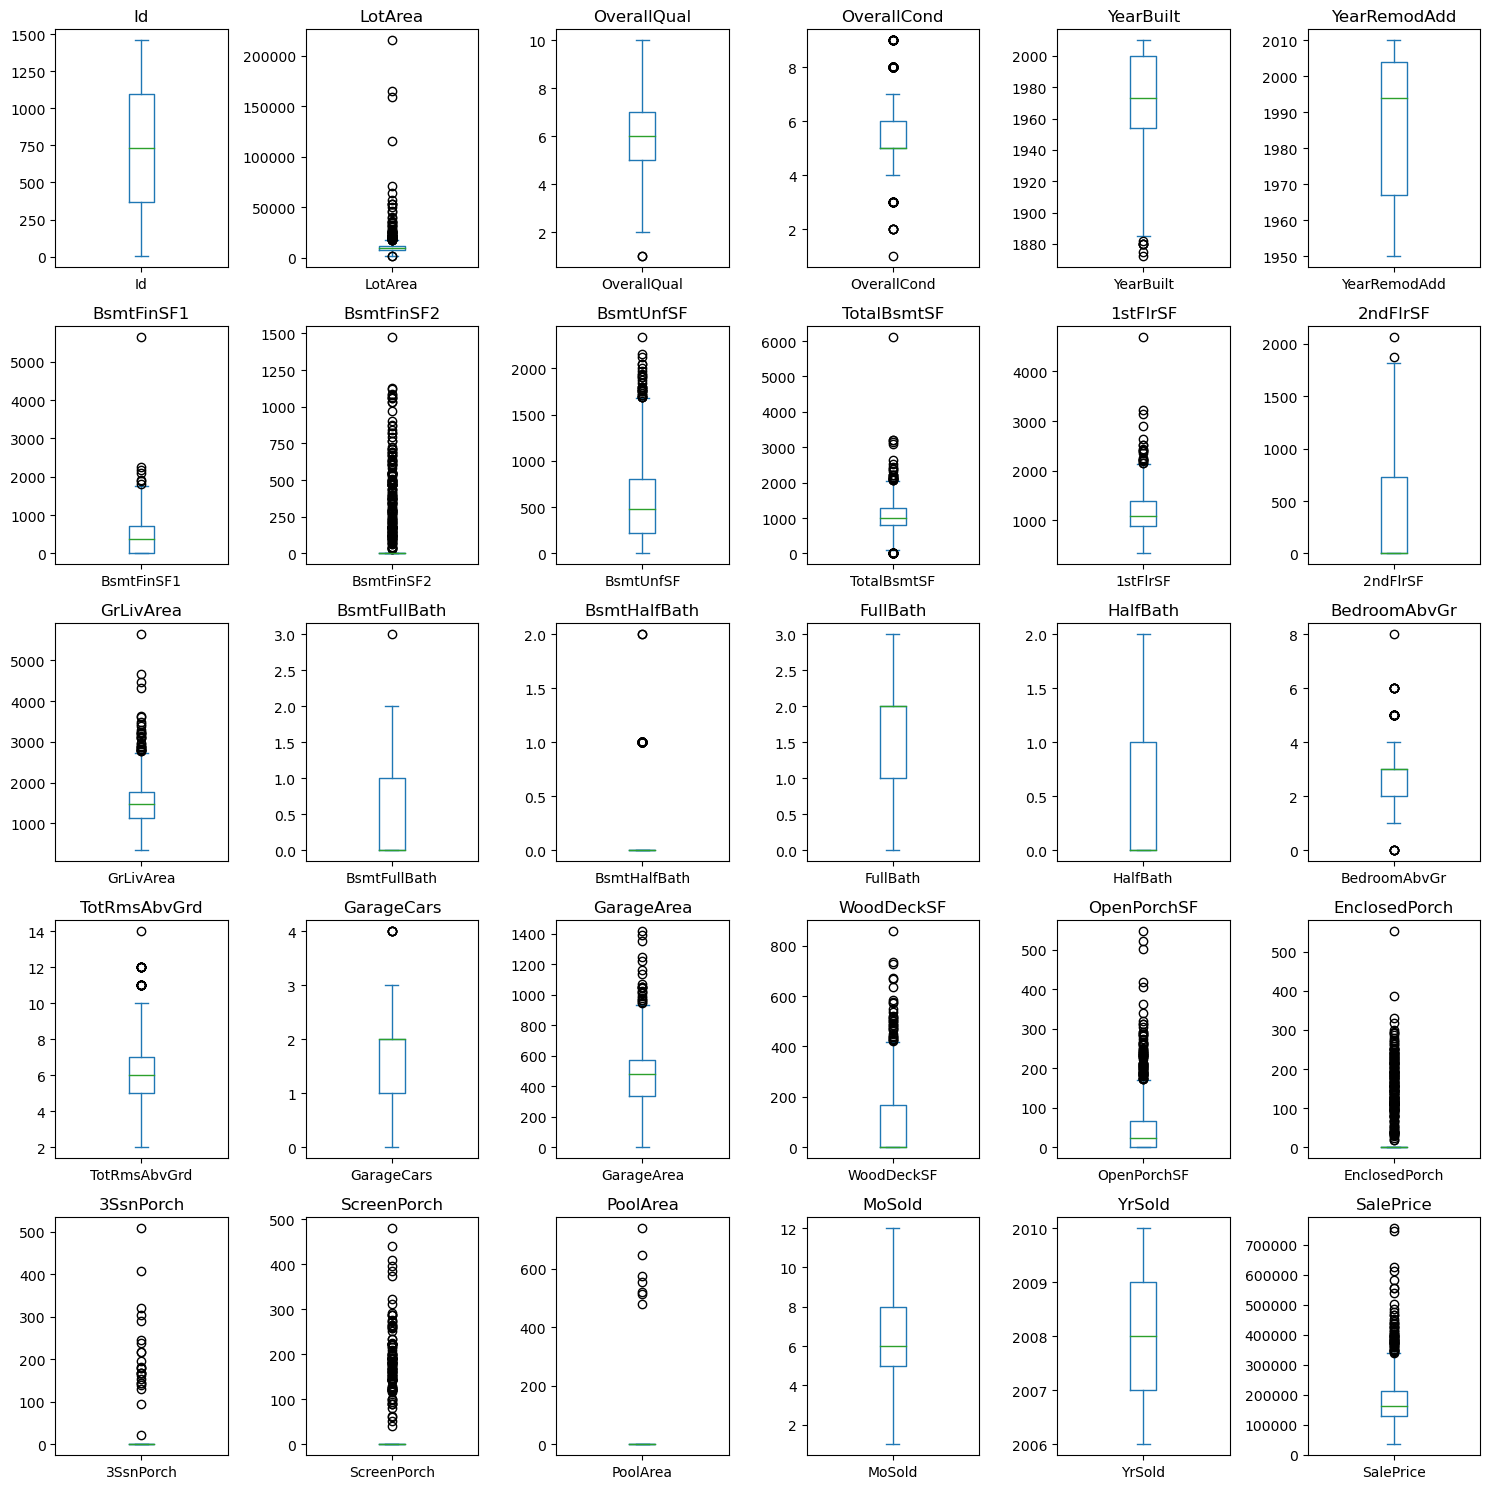

In [13]:
outlier_handler.plot_boxplots_for_all_numeric()

In [14]:
outlier_handler.show_outlier_stats(IQR_multi=5)

,OutlierCount
1stFlrSF,1
3SsnPorch,24
BsmtFinSF1,1
BsmtFinSF2,167
BsmtHalfBath,82
EnclosedPorch,208
GrLivArea,1
LotArea,21
OpenPorchSF,4
PoolArea,7


I think i need to focus on **Sales Price** and **Lot Area** for outliers. All others currently will remain the same until feature engineering finished. Because these features may be misleading since they will undergo some operations in feature engineering

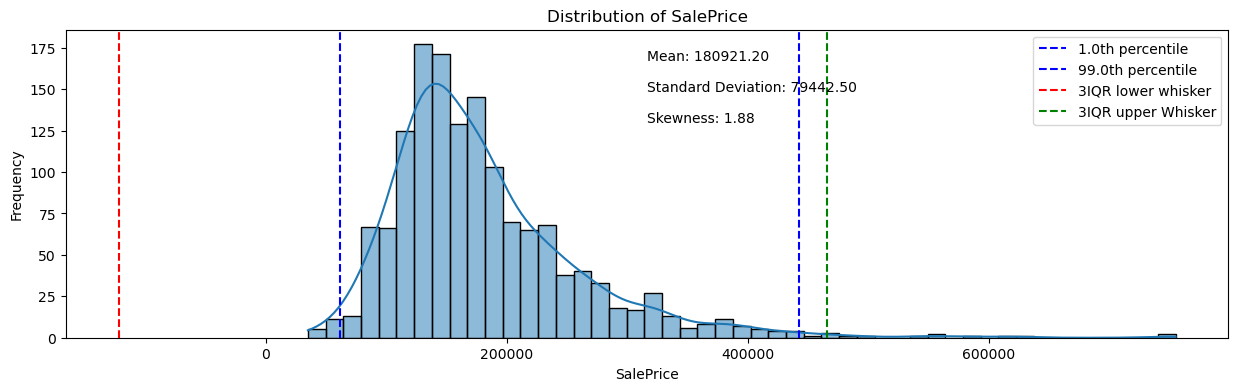

In [15]:
outlier_handler.plot_dtl_hist('SalePrice', IQR_multi=3)

In [16]:
outlier_handler.show_outliers_for_features('SalePrice', IQR_multi=3)

,Id,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleCondition,SalePrice,SaleType
178,179,17423,StoneBr,1Story,9,5,2008,2009,Ex,TA,No,GLQ,1904,Unf,0,312,2216,2234,0,2234,1,0,2,0,1,Ex,9,Attchd,2009.0,Fin,3,1166,TA,TA,0,60,0,0,0,0,NP,NF,7,2009,Partial,501837,New
185,186,22950,OldTown,2.5Fin,10,9,1892,1993,TA,TA,Mn,Unf,0,Unf,0,1107,1107,1518,1518,3608,0,0,2,1,4,Ex,12,Detchd,1993.0,Unf,3,840,Ex,TA,0,260,0,0,410,0,NP,GdPrv,6,2006,Normal,475000,WD
440,441,15431,NridgHt,1Story,10,5,2008,2008,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,2402,0,2402,1,0,2,0,2,Ex,10,Attchd,2008.0,Fin,3,672,TA,TA,0,72,0,0,170,0,NP,NF,4,2009,Normal,555000,WD
691,692,21535,NoRidge,2Story,10,6,1994,1995,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,2444,1872,4316,0,1,3,1,4,Ex,10,Attchd,1994.0,Fin,3,832,TA,TA,382,50,0,0,0,0,NP,NF,1,2007,Normal,755000,WD
769,770,53504,StoneBr,2Story,8,5,2003,2003,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,1690,1589,3279,1,0,3,1,4,Ex,12,BuiltIn,2003.0,Fin,3,841,TA,TA,503,36,0,0,210,0,NP,NF,6,2010,Normal,538000,WD
798,799,13518,NridgHt,2Story,9,5,2008,2009,Ex,TA,No,Unf,0,Unf,0,1926,1926,1966,1174,3140,0,0,3,1,4,Ex,11,BuiltIn,2009.0,Fin,3,820,TA,TA,144,78,0,0,0,0,NP,NF,7,2009,Partial,485000,New
803,804,13891,NridgHt,2Story,9,5,2008,2009,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,1734,1088,2822,0,0,3,1,4,Ex,12,BuiltIn,2009.0,RFn,3,1020,TA,TA,52,170,0,0,192,0,NP,NF,1,2009,Partial,582933,New
898,899,12919,NridgHt,1Story,9,5,2009,2010,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,2364,0,2364,1,0,2,1,2,Ex,11,Attchd,2009.0,Fin,3,820,TA,TA,0,67,0,0,0,0,NP,NF,3,2010,Partial,611657,New
1046,1047,16056,StoneBr,2Story,9,5,2005,2006,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,1992,876,2868,0,0,3,1,4,Ex,11,BuiltIn,2005.0,Fin,3,716,TA,TA,214,108,0,0,0,0,NP,NF,7,2006,Partial,556581,New
1169,1170,35760,NoRidge,2Story,10,5,1995,1996,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,1831,1796,3627,1,0,3,1,4,Gd,10,Attchd,1995.0,Fin,3,807,TA,TA,361,76,0,0,0,0,NP,NF,7,2006,Normal,625000,WD


I dont want to drop these observations since they have really valuable pricing informations. All of them have 9-10 OverallQual and having 8+ rooms

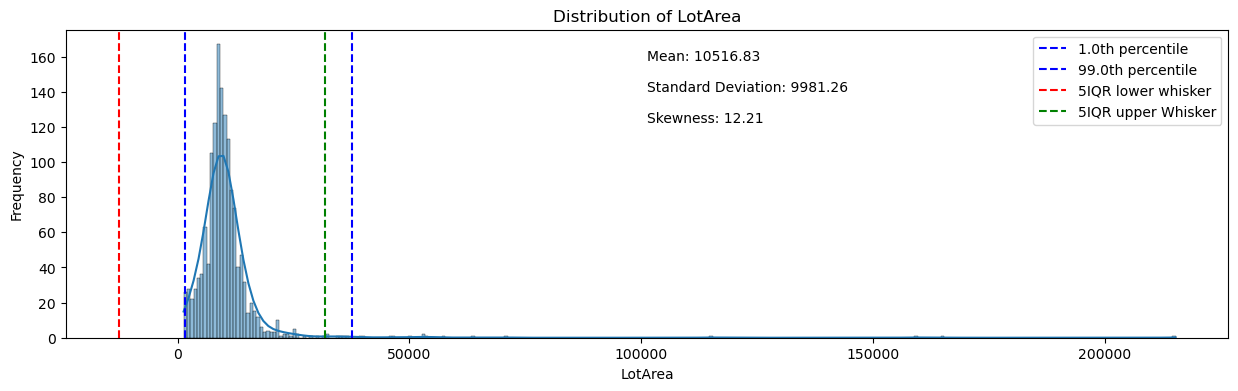

In [17]:
outlier_handler.plot_dtl_hist('LotArea', IQR_multi=5)

In [18]:
outliers_LotArea = outlier_handler.show_outliers_for_features('LotArea', method='tresholds')
print(len(outliers_LotArea)/len(df2)*100)  #percent of 99% tresholds outliers
outliers_LotArea

1.5068493150684932


,Id,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleCondition,SalePrice,SaleType
53,54,50271,Veenker,1Story,9,5,1981,1987,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,1842,0,1842,2,0,0,1,0,Gd,5,Attchd,1981.0,Fin,3,894,TA,TA,857,72,0,0,0,0,NP,NF,11,2006,Normal,385000,WD
75,76,1596,MeadowV,SLvl,4,5,1973,1973,Gd,TA,Gd,GLQ,462,Unf,0,0,462,526,462,988,1,0,1,0,2,TA,5,BuiltIn,1973.0,Unf,1,297,TA,TA,120,101,0,0,0,0,NP,GdWo,11,2009,Normal,91000,WD
249,250,159000,ClearCr,1.5Fin,6,7,1958,2006,Gd,TA,Gd,Rec,697,Unf,0,747,1444,1444,700,2144,0,1,2,0,4,Gd,7,Attchd,1958.0,Fin,2,389,TA,TA,0,98,0,0,0,0,NP,NF,6,2007,Normal,277000,WD
271,272,39104,ClearCr,1Story,7,7,1954,2005,Gd,TA,Gd,LwQ,226,GLQ,1063,96,1385,1363,0,1363,1,0,1,0,2,TA,5,Attchd,1954.0,Unf,2,439,TA,TA,81,0,0,0,0,0,NP,NF,4,2008,Normal,241500,WD
313,314,215245,Timber,1Story,7,5,1965,1965,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,2036,0,2036,2,0,2,0,3,TA,8,Attchd,1965.0,RFn,2,513,TA,TA,0,0,0,0,0,0,NP,NF,6,2009,Normal,375000,WD
335,336,164660,Timber,1.5Fin,5,6,1965,1965,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,1619,167,1786,2,0,2,0,3,TA,7,Attchd,1965.0,Fin,2,529,TA,TA,670,0,0,0,0,0,NP,NF,8,2008,Normal,228950,WD
384,385,53107,ClearCr,2Story,6,5,1992,1992,Gd,TA,Av,GLQ,985,Unf,0,595,1580,1079,874,1953,1,0,2,1,3,Gd,9,Attchd,1992.0,Fin,2,501,TA,TA,216,231,0,0,0,0,NP,NF,6,2007,Normal,240000,WD
451,452,70761,ClearCr,1Story,7,5,1975,1975,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,1533,0,1533,1,0,2,0,2,Gd,5,Attchd,1975.0,Unf,2,576,TA,TA,200,54,0,0,0,0,NP,NF,12,2006,Normal,280000,WD
457,458,53227,ClearCr,1Story,4,6,1954,1994,Gd,TA,Gd,BLQ,1116,Unf,0,248,1364,1663,0,1663,1,0,1,0,2,Gd,6,Attchd,1954.0,Fin,2,529,TA,TA,224,137,0,0,0,0,NP,NF,3,2008,Normal,256000,WD
489,490,1526,MeadowV,SFoyer,4,8,1970,2002,Gd,TA,Av,GLQ,515,Unf,0,115,630,630,0,630,1,0,1,0,1,Gd,3,Attchd,1970.0,Unf,1,286,TA,TA,0,0,0,0,0,0,NP,NF,5,2009,Normal,86000,WD


In [19]:
df2.shape

(1460, 47)

In [20]:
# i will drop these values
df2.drop(outliers_LotArea.index, inplace=True)

In [21]:
outlier_handler = FatihOutliers(df2)

In [22]:
df2.shape

(1438, 47)

In [23]:
# df3 is the version of dataframe --> missing values DONE, outliers DONE
df3 = df2.copy()

-----

## 3.3. Feature Engineering

**A Brief Explanation of the approach**

........  
........  
........

**Codes with very short explanations, if needed**

__3.3.1 Sub titles if needed__

# 4. Exploratory data Analysis

## Statistical Analysis And Visualisations

# 5. Feature Preprocessing

## 5.1. Encoding

**A Brief Explanation of the approach**

........  
........  
........

**Codes with very short explanations, if needed**

## 5.2. Standardizing, Normalizing and other Transformations

### 5.2.1. Standardizing (if needed)

**A Brief Explanation of the approach**

........  
........  
........

**Codes with very short explanations, if needed**

### 5.2.2. Normalizing (if needed)

**A Brief Explanation of the approach**

........  
........  
........

**Codes with very short explanations, if needed**

### 5.2.3. Other Transformations (if needed)

**A Brief Explanation of the approach**

........  
........  
........

**Codes with very short explanations, if needed**

## 5.3. Dealing with High/Low Cardinality, Multi-collinearity

**A Brief Explanation of the approach**

........  
........  
........

**Codes with very short explanations, if needed**

----  
----

# 6. Modeling